In [1]:
import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split


def prepare_data(valid_digits=np.array((6, 5))):
    ## valid_digits is a vector containing the digits
    ## we wish to classify.
    ## Do not change anything inside of this function
    if len(valid_digits) != 2:
        raise Exception("Error: you must specify exactly 2 digits for classification!")

    data = ds.load_digits()
    labels = data['target']
    features = data['data']

    X = features[(labels == valid_digits[0]) | (labels == valid_digits[1]), :]
    Y = labels[(labels == valid_digits[0]) | (labels == valid_digits[1]),]

    X = np.asarray(map(lambda k: X[k, :] / X[k, :].max(), range(0, len(X))))

    Y[Y == valid_digits[0]] = 0
    Y[Y == valid_digits[1]] = 1

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
    Y_train = Y_train.reshape((len(Y_train), 1))
    Y_test = Y_test.reshape((len(Y_test), 1))

    return X_train, Y_train, X_test, Y_test

In [4]:
X_train, Y_train, X_test, Y_test = prepare_data()

In [2]:
####################################################
## Function 1: Support vector machine  ##
####################################################

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##
## Train an SVM to classify the digits data ##
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##

def my_SVM(X_train, Y_train, X_test, Y_test, lamb=0.01, num_iterations=200, learning_rate=0.1):
    ## X_train: Training set of features
    ## Y_train: Training set of labels corresponding to X_train
    ## X_test: Testing set of features
    ## Y_test: Testing set of labels correspdonding to X_test
    ## lamb: Regularization parameter
    ## num_iterations: Number of iterations.
    ## learning_rate: Learning rate.

    ## Function should learn the parameters of an SVM.
    n = X_train.shape[0]
    p = X_train.shape[1] + 1
    X_train1 = np.concatenate((np.repeat(1, n, axis=0).reshape((n, 1)), X_train), axis=1)
    Y_train = 2 * Y_train - 1
    beta = np.repeat(0., p, axis=0).reshape((p, 1))

    ntest = X_test.shape[0]
    X_test1 = np.concatenate((np.repeat(1, ntest, axis=0).reshape((ntest, 1)), X_test), axis=1)
    Y_test = 2 * Y_test - 1

    acc_train = np.repeat(0., num_iterations, axis=0)
    acc_test = np.repeat(0., num_iterations, axis=0)
    
    for it in range(num_iterations):
        score = np.dot(X_train1, beta)
        delta = score*Y_train < 1
        dbeta =  np.dot(np.repeat(1, n, axis=0).reshape(1, n), (np.repeat(np.array(delta*Y_train), p).reshape(n,p)*X_train1)/n)
        beta = beta + learning_rate*dbeta.T
        beta[1:,] = beta[1:,] - lamb*beta[1:,]
        
        acc_train[it] = np.mean(np.sign(score*Y_train))
        acc_test[it] = np.mean(np.sign(np.dot(X_test1, beta)*Y_test))
        
    ## Function should output 3 things:
    ## 1. The learned parameters of the SVM, beta
    ## 2. The accuracy over the training set, acc_train (a "num_iterations" dimensional vector).
    ## 3. The accuracy over the testing set, acc_test (a "num_iterations" dimensional vector).

    return beta, acc_train, acc_test

In [5]:
beta_svm, train_svm, test_svm = my_SVM(X_train, Y_train, X_test, Y_test)

In [22]:
######################################
## Function 2: Adaboost ##
######################################

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##
## Use Adaboost to classify the digits data ##
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##

def my_Adaboost(X_train, Y_train, X_test, Y_test, num_iterations=200):
    ## X_train: Training set of features
    ## Y_train: Training set of labels corresponding to X_train
    ## X_test: Testing set of features
    ## Y_test: Testing set of labels correspdonding to X_test
    ## num_iterations: Number of iterations.

    ## Function should learn the parameters of an Adaboost classifier.

    n = X_train.shape[0]
    p = X_train.shape[1]
    threshold = 0.8

    X_train1 = 2 * (X_train > threshold) - 1
    Y_train = 2 * Y_train - 1

    X_test1 = 2 * (X_test > threshold) - 1
    Y_test = 2 * Y_test - 1

    beta = np.repeat(0., p).reshape((p, 1))
    w = np.repeat(1. / n, n).reshape((n, 1))

    acc_train = np.repeat(0., num_iterations, axis=0)
    acc_test = np.repeat(0., num_iterations, axis=0)

    for it in range(num_iterations):
        w = w/np.sum(w)
        a = np.dot(np.repeat(1, n, axis=0).reshape(1, n), (np.repeat(np.array(w*Y_train), p).reshape(n,p)*X_train1))
        e = (1-a)/2
        k = np.argmin(e)
        db = .5*np.log((1-e[0,k])/e[0,k])
        beta[k] = beta[k] + db
        w = w*np.exp(-Y_train*X_train1[:,k].reshape(n,1)*db)
        
        acc_train[it] = np.mean(np.sign(np.dot(X_train1, beta))== Y_train)
        acc_test[it] = np.mean(np.sign(np.dot(X_test1, beta))==Y_test)
    ## Function should output 3 things:
    ## 1. The learned parameters of the adaboost classifier, beta
    ## 2. The accuracy over the training set, acc_train (a "num_iterations" dimensional vector).
    ## 3. The accuracy over the testing set, acc_test (a "num_iterations" dimensional vector).
    return beta, acc_train, acc_test


############################################################################
## Testing your functions and visualize the results here##
############################################################################

X_train, Y_train, X_test, Y_test = prepare_data()


####################################################
## Optional examples (comment out your examples!) ##
####################################################

In [23]:
X_train2, Y_train2, X_test2, Y_test2 = prepare_data()

In [24]:
beta_ada, train_ada, test_ada = my_Adaboost(X_train, Y_train, X_test, Y_test)

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

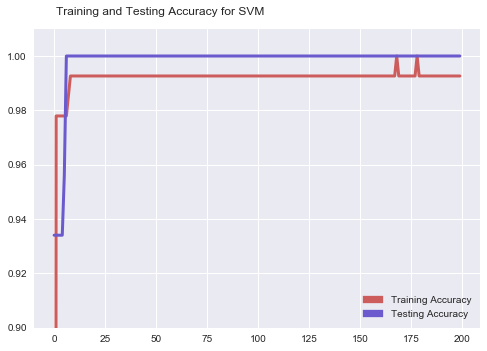

In [84]:
x = range(200)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(.9,1.01)
ax.plot(x, train_svm, color='indianred', linewidth=3)
ax.plot(x, test_svm, color='slateblue', linewidth=3)
ax.text(1,1.015, 'Training and Testing Accuracy for SVM')

#Legend patches
trainpatch = mpatches.Patch(color='indianred', label='Training Accuracy')
testpatch = mpatches.Patch(color='slateblue', label='Testing Accuracy')
plt.legend(handles=[trainpatch, testpatch])
plt.savefig('svm_accuracy.png')
plt.show()

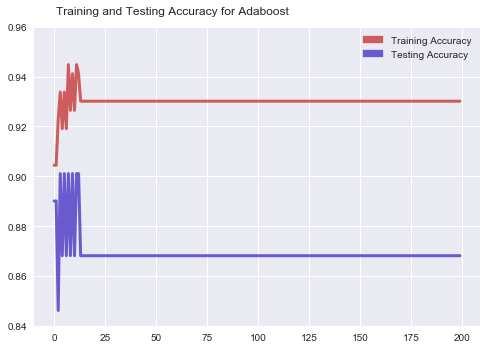

In [98]:
x = range(200)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0.84,.96)
ax.plot(x, train_ada, color='indianred', linewidth=3)
ax.plot(x, test_ada, color='slateblue', linewidth=3)
ax.text(1,.965, 'Training and Testing Accuracy for Adaboost')

#Legend patches
trainpatch = mpatches.Patch(color='indianred', label='Training Accuracy')
testpatch = mpatches.Patch(color='slateblue', label='Testing Accuracy')
plt.legend(handles=[trainpatch, testpatch])
plt.savefig('adaboost_acc.png')
plt.show()

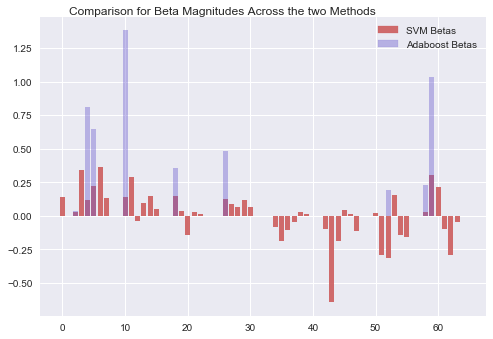

In [113]:
x = range(65)
x_1 = range(64)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x, beta_svm, color='indianred', alpha=.9, zorder = 5)
ax.bar(x_1, beta_ada, color='slateblue',alpha=.4, zorder = 10)
ax.text(1,1.5, 'Comparison for Beta Magnitudes Across the two Methods')

#Legend patches
trainpatch = mpatches.Patch(color='indianred', label='SVM Betas', alpha = .9)
testpatch = mpatches.Patch(color='slateblue', label='Adaboost Betas', alpha = .4)
plt.legend(handles=[trainpatch, testpatch])
plt.savefig('avm_ada_betas.png')
plt.show()

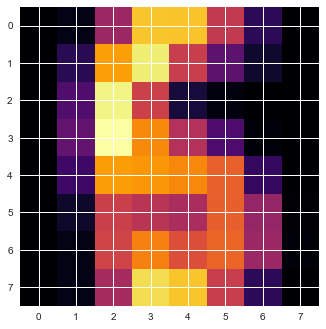

In [86]:
mean_xtrain_in = np.mean(X_train, axis=0).reshape(8, 8)
plt.imshow(mean_xtrain_in, cmap=mpl.cm.get_cmap("inferno"))
plt.savefig('mean_Xtrain.png')
plt.show()

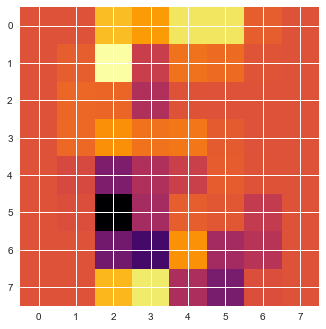

In [87]:
mean_xtrain_svm = np.mean(X_train*np.repeat(beta_svm[1:, :], 272, axis=0).reshape(64, 272).T, axis=0).reshape(8, 8)
plt.imshow(mean_xtrain_svm, cmap=mpl.cm.get_cmap("inferno"))
plt.savefig('mean_svm_train.png')
plt.show()

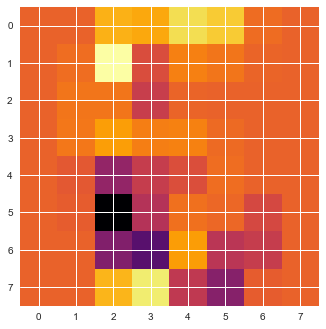

In [82]:
mean_xtest_svm = np.mean(X_test*np.repeat(beta_svm[1:, :], 91, axis=0).reshape(64, 91).T, axis=0).reshape(8, 8)
plt.imshow(mean_xtest_svm, cmap=mpl.cm.get_cmap("inferno"))
plt.savefig('mean_svm_test.png')
plt.show()

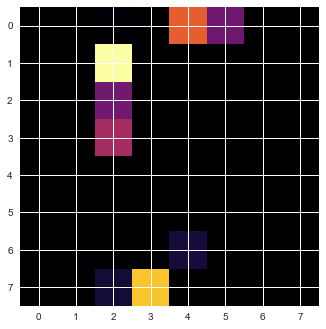

In [88]:
mean_xtrain_ada = np.mean(X_train2*np.repeat(beta_ada, 272, axis=0).reshape(64, 272).T, axis=0).reshape(8, 8)
plt.imshow(mean_xtrain_ada, cmap=mpl.cm.get_cmap("inferno"))
plt.savefig('mean_ada_train.png')
plt.show()

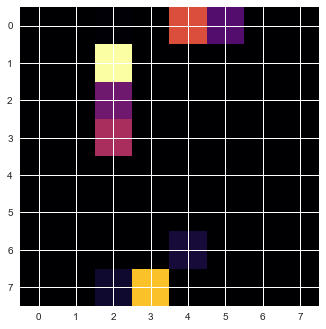

In [89]:
mean_xtest_ada = np.mean(X_test2*np.repeat(beta_ada, 91, axis=0).reshape(64, 91).T, axis=0).reshape(8, 8)
plt.imshow(mean_xtest_ada, cmap=mpl.cm.get_cmap("inferno"))
plt.savefig('mean_ada_test.png')
plt.show()

In [90]:
#for a threshold of .5:
def my_Adaboost_2(X_train, Y_train, X_test, Y_test, num_iterations=200):
    n = X_train.shape[0]
    p = X_train.shape[1]
    threshold = 0.5

    X_train1 = 2 * (X_train > threshold) - 1
    Y_train = 2 * Y_train - 1

    X_test1 = 2 * (X_test > threshold) - 1
    Y_test = 2 * Y_test - 1

    beta = np.repeat(0., p).reshape((p, 1))
    w = np.repeat(1. / n, n).reshape((n, 1))

    for it in range(num_iterations):
        w = w/np.sum(w)
        a = np.dot(np.repeat(1, n, axis=0).reshape(1, n), (np.repeat(np.array(w*Y_train), p).reshape(n,p)*X_train1))
        e = (1-a)/2
        k = np.argmin(e)
        db = .5*np.log((1-e[0,k])/e[0,k])
        beta[k] = beta[k] + db
        w = w*np.exp(-Y_train*X_train1[:,k].reshape(n,1)*db)
    
    return beta


############################################################################
## Testing your functions and visualize the results here##
############################################################################

X_train, Y_train, X_test, Y_test = prepare_data()
beta_ada_2 = my_Adaboost_2(X_train, Y_train, X_test, Y_test)

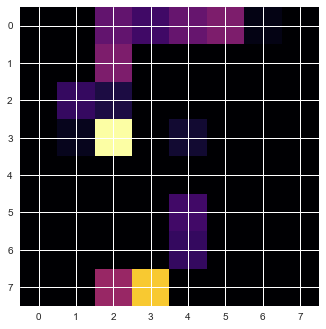

In [91]:
mean_ada_thresh = np.mean(X_train*np.repeat(beta_ada_2, 272, axis=0).reshape(64, 272).T, axis=0).reshape(8, 8)
plt.imshow(mean_ada_thresh, cmap=mpl.cm.get_cmap("inferno"))
plt.show()

In [ ]:
######################################
#Code from the notes
######################################

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##
## Use Adaboost to classify the digits data ##
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##

def my_Adaboost(X_train, Y_train, X_test, Y_test, num_iterations=200):
    ## X_train: Training set of features
    ## Y_train: Training set of labels corresponding to X_train
    ## X_test: Testing set of features
    ## Y_test: Testing set of labels correspdonding to X_test
    ## num_iterations: Number of iterations.

    ## Function should learn the parameters of an Adaboost classifier.

    n = X_train.shape[0]
    p = X_train.shape[1]
    threshold = 0.8

    X_train1 = 2 * (X_train > threshold) - 1
    Y_train = 2 * Y_train - 1

    X_test1 = 2 * (X_test > threshold) - 1
    Y_test = 2 * Y_test - 1

    beta = np.repeat(0., p).reshape((p, 1)) #px1
    w = np.repeat(1. / n, n).reshape((n, 1)) #nx1

    weak_results = np.multiply(Y_train, X_train1) > 0 #nxp y_i h(x_i)

    acc_train = np.repeat(0., num_iterations, axis=0)
    acc_test = np.repeat(0., num_iterations, axis=0)

    for it in range(num_iterations):
        w = w/np.sum(w) #normalized w
        weighted_weak_results = w[:,0]*weak_results
        weighted_accuracy = np.dot(np.repeat(1, n, axis=0).reshape(1, n), weighted_weak_results)
        e=1-weighted_accuracy
        k = e.argmin()
        dbeta = np.log((1-e[k])/e[k])/2
        beta[k] = beta[k] + dbeta
        w = w*np.exp(-Y_train*X[:,k]*db)
        
        #acc_train[it] <- mean(sign(X_train1 %*% beta) == Y_train)
        #acc_test[it] <- mean(sign(X_test1 %*% beta) == Y_test)